# Analiza danych i uczenie maszynowe - laboratorium splotowe sieci neuronowe

## Przykład

Reprezentacja sieci splotowej jako zwykłej sieci warstwy

In [ ]:
import sympy

iw, ih = 4, 3

im = sympy.Matrix([[sympy.Symbol(f"I_{i},{j}") for i in range(iw)] for j in range(ih)]) #ustawienie macierzy o wymiarach 3x4 i wyrazach I o odpowiednich idexach
w = sympy.Matrix([[sympy.Symbol(f"w_{i},{j}") for i in range(2)] for j in range(2)]) #ustawienie macierzy o wymiarach 2x2 i wyrazach w o odpowiednich idexach

ww, wh = 2, 2

In [ ]:
o = sympy.Matrix( #wzór na utworzenie macierzy ze splotu dwóch macierzy (w tym wypadku im oraz w)
    [
        [sum(im[m : (m + wh), l * m : (l * m + ww)] * w) for m in range(iw - ww + 1)]
        for l in range(ih - wh + 1)
    ]
)

o

Matrix([
[I_0,0*w_0,0 + I_0,0*w_1,0 + I_0,1*w_0,0 + I_0,1*w_1,0 + I_1,0*w_0,1 + I_1,0*w_1,1 + I_1,1*w_0,1 + I_1,1*w_1,1, I_0,1*w_0,0 + I_0,1*w_1,0 + I_0,2*w_0,0 + I_0,2*w_1,0 + I_1,1*w_0,1 + I_1,1*w_1,1 + I_1,2*w_0,1 + I_1,2*w_1,1, I_0,2*w_0,0 + I_0,2*w_1,0 + I_1,2*w_0,1 + I_1,2*w_1,1],
[I_0,0*w_0,0 + I_0,0*w_1,0 + I_0,1*w_0,0 + I_0,1*w_1,0 + I_1,0*w_0,1 + I_1,0*w_1,1 + I_1,1*w_0,1 + I_1,1*w_1,1, I_1,1*w_0,0 + I_1,1*w_1,0 + I_1,2*w_0,0 + I_1,2*w_1,0 + I_2,1*w_0,1 + I_2,1*w_1,1 + I_2,2*w_0,1 + I_2,2*w_1,1, I_2,2*w_0,0 + I_2,2*w_1,0 + I_3,2*w_0,1 + I_3,2*w_1,1]])

In [ ]:
xf = sympy.Matrix(im.flat()) #wypłaszczenie macierzy im
xf

Matrix([
[I_0,0],
[I_1,0],
[I_2,0],
[I_3,0],
[I_0,1],
[I_1,1],
[I_2,1],
[I_3,1],
[I_0,2],
[I_1,2],
[I_2,2],
[I_3,2]])

In [ ]:
WW = sympy.Matrix(o.flat()).jacobian(xf) #jacoian z spłaszczonej macierzy splotu oraz spłaszczonej wyrzej macierzy xf, nie rozpisuje dokładniej, nie mieliśmy tego nigdy, ani teraz na wykładzie, ani wcześniej

WW

Matrix([
[w_0,0 + w_1,0, w_0,1 + w_1,1, 0, 0, w_0,0 + w_1,0, w_0,1 + w_1,1,             0, 0,             0,             0,             0,             0],
[            0,             0, 0, 0, w_0,0 + w_1,0, w_0,1 + w_1,1,             0, 0, w_0,0 + w_1,0, w_0,1 + w_1,1,             0,             0],
[            0,             0, 0, 0,             0,             0,             0, 0, w_0,0 + w_1,0, w_0,1 + w_1,1,             0,             0],
[w_0,0 + w_1,0, w_0,1 + w_1,1, 0, 0, w_0,0 + w_1,0, w_0,1 + w_1,1,             0, 0,             0,             0,             0,             0],
[            0,             0, 0, 0,             0, w_0,0 + w_1,0, w_0,1 + w_1,1, 0,             0, w_0,0 + w_1,0, w_0,1 + w_1,1,             0],
[            0,             0, 0, 0,             0,             0,             0, 0,             0,             0, w_0,0 + w_1,0, w_0,1 + w_1,1]])

Walidacja poprawności

In [ ]:
sympy.simplify(WW @ xf - sympy.Matrix(o.flat())) #sprawdzenie czy splot zaszedł poprawnie

Matrix([
[0],
[0],
[0],
[0],
[0],
[0]])

# Zadanie 1

Zbudować model klasyfikacji `RGB` w keras

In [ ]:
import pandas as pd
import numpy as np

rgb = pd.read_csv("./pixels.csv")
rgb

,r,g,b,klasa
0,0.988235,0.811765,0.721569,s
1,0.917647,0.760784,0.729412,s
2,0.843137,0.737255,0.701961,s
3,0.937255,0.870588,0.792157,b
4,0.243137,0.133333,0.078431,b
...,...,...,...,...
59995,0.745098,0.737255,0.647059,b
59996,0.913725,0.890196,0.905882,s
59997,0.854902,0.658824,0.529412,s
59998,0.631373,0.529412,0.337255,b


In [ ]:
# TODO

import keras
from keras import layers
from sklearn.model_selection import train_test_split

X = np.asarray(rgb[['r','g','b']]) #Mamy trzy różne X: R, G i B dla danego pixela
y = np.asarray(pd.get_dummies(rgb['klasa'], dtype=np.float32)) #get_dummies w miejsce każdej zmiennej wrzuca tyle 0 i 1 ile jest różnych zmiennych,
#czyli u nas są dwie zmienne s i b, dlatego pod s podstawiane jest [0, 1] = [b, s] - czyli false (0) dla b i true (1) dla s, analogicznie dla b [1, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42) #funkcja ta dzieli dane na dane testowe oraz treningowe
#w tym wypadku 0.33 z całości danych idzie do testowcyh, dane są mieszane dzięki shuffle, a random state to po prostu seed chyba

model = keras.Sequential((#definiowanie kolejnych warstw w sieci
    layers.Dense(8, activation='relu'), #zwykła sieć neuronowa w naszym przypadku ma tyle wejść ile jest różnych X, czyli 3 i ma 8 neuronów, a nielinowa funkcja aktywacji to relu
    layers.Dense(8, activation=keras.activations.tanh), #zwykła sieć neuronowa w naszym przypadku ma tyle wejść ile ma poprzednia warstwa, czyli 8 i ma 8 neuronów, a nielinowa funkcja aktywacji to tangh
    layers.Dense(2)  #zwykła sieć neuronowa w naszym przypadku ma tyle wejść ile ma poprzednia warstwa, czyli 8 i ma 2 wyjścia, o tyle mamy klas w Y
))

model.compile(#kompilowanie modelu pod trenowanie
    loss=keras.losses.CategoricalCrossentropy(from_logits=True), #wyranie metody wyliczania loss metodą entropikrzyżowej dla kategoryzacji
    optimizer=keras.optimizers.Adam(), #definiowanie jak model się ma uczyć Adam - uczy się metodą opadania gradientowego, która opiera się na adaptacyjnym szacowaniu momentów pierwszego i drugiego rzędu. (cokolwiek to znaczy xd)
    metrics=['accuracy', keras.metrics.AUC()] #inne metryki oprócz lossu wyliczane podczas trenowania i testowania
)

h = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test)) #trenowanie modelu na podstawie dancyh treningowych, epochs mówi ile razy ędziemy iterować przez dane treningowe

Epoch 1/50
1257/1257 [==============================] - 38s 26ms/step - loss: 0.5783 - accuracy: 0.7042 - auc_1: 0.6992 - val_loss: 0.5226 - val_accuracy: 0.7503 - val_auc_1: 0.7664
Epoch 2/50
1257/1257 [==============================] - 27s 21ms/step - loss: 0.5110 - accuracy: 0.7509 - auc_1: 0.7790 - val_loss: 0.4945 - val_accuracy: 0.7598 - val_auc_1: 0.7969
Epoch 3/50
1257/1257 [==============================] - 28s 22ms/step - loss: 0.4835 - accuracy: 0.7649 - auc_1: 0.8039 - val_loss: 0.4679 - val_accuracy: 0.7778 - val_auc_1: 0.8171
Epoch 4/50
1257/1257 [==============================] - 32s 26ms/step - loss: 0.4623 - accuracy: 0.7828 - auc_1: 0.8241 - val_loss: 0.4512 - val_accuracy: 0.7989 - val_auc_1: 0.8388
Epoch 5/50
1257/1257 [==============================] - 29s 23ms/step - loss: 0.4454 - accuracy: 0.7967 - auc_1: 0.8396 - val_loss: 0.4388 - val_accuracy: 0.8071 - val_auc_1: 0.8499
Epoch 6/50
1257/1257 [==============================] - 23s 18ms/step - loss: 0.4353 - acc

<Axes: >

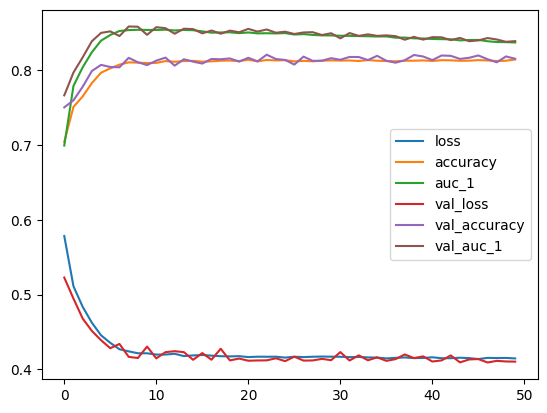

In [ ]:
pd.DataFrame(h.history).plot() #w osi y wartości metryk w osi x numer iteracji epochs

# Zadanie 2

Zbudowac model klasyfikacji obrazów

- dodać walidację
- dropout
- narysować przebieg loss z treningu

In [ ]:
!gdown -O ../dataset_3labels_small.zip 1hUURHm1jA4ZT4O4xVhUT8bOFHSBqkAL3

Downloading...
From: https://drive.google.com/uc?id=1hUURHm1jA4ZT4O4xVhUT8bOFHSBqkAL3
To: /dataset_3labels_small.zip
100% 15.6M/15.6M [00:00<00:00, 68.8MB/s]


In [ ]:
!unzip dataset_3labels_small.zip

Archive:  dataset_3labels_small.zip
   creating: 00000/
   creating: 00000/RED/
  inflating: 00000/RED/00002.png     
  inflating: 00000/RED/00006.png     
  inflating: 00000/RED/00007.png     
  inflating: 00000/RED/00003.png     
  inflating: 00000/RED/00005.png     
  inflating: 00000/RED/00000.png     
  inflating: 00000/RED/00004.png     
  inflating: 00000/RED/00001.png     
   creating: 00000/OTHER/
  inflating: 00000/OTHER/00002.png   
  inflating: 00000/OTHER/00003_.png  
 extracting: 00000/OTHER/00006.png   
  inflating: 00000/OTHER/00001_.png  
  inflating: 00000/OTHER/00007.png   
  inflating: 00000/OTHER/00000_.png  
  inflating: 00000/OTHER/00003.png   
  inflating: 00000/OTHER/00007_.png  
  inflating: 00000/OTHER/00005.png   
 extracting: 00000/OTHER/00002_.png  
  inflating: 00000/OTHER/00000.png   
  inflating: 00000/OTHER/00004.png   
  inflating: 00000/OTHER/00005_.png  
  inflating: 00000/OTHER/00004_.png  
  inflating: 00000/OTHER/00006_.png  
  inflating: 00000/O

In [ ]:
import glob
import keras

labels = []
imgs = []

for im in glob.glob("./*/*/*.png"): #iteracja po wszystkich png
    label = im.split("/")[-2] #im jest nazwą pliku (./00044/GREEN/00007.png - przykład)
    labels.append(label) #do listy labeli dodajemy, co jest na rysunku, red, green, other
    image = keras.utils.load_img(im) #wczytanie obrazka na podstawie nazwy
    input_arr = keras.utils.img_to_array(image) #zapisanie obrazka w formacie rgb w liście

    imgs.append(input_arr) #dodanie obrazka w formacjie rgb do listy obrazków

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.stack(imgs) / 255.0 - 0.5 #połączenie wszystkich osobnych list zawarty w imgs w jedną podzielenie wartości przez 255, ay otrzymać wartości od 0 do 1 i pomniejszenie wartości o 0.5 i otrzymanie od -0.5 do 0.5
u = list(np.unique(labels)) #lsita unikalnych wartości w labels (red, green, other)

ilabels = np.asarray([u.index(l) for l in labels]) #utworzenie nowej listy zawierającyh wartości unikalne w postaci liczb, a nie tekstu

X_train, X_test, y_train, y_test = train_test_split(X, ilabels, test_size=0.33, shuffle=True, random_state=42) #podzielenie danych na treningowe i testowe, jak wyżej


In [ ]:
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = keras.Sequential(
    [
    Conv2D(8, (3,3), strides=(1,1), activation="relu"), #z 3 wartości rgb przekazujemy dane na 8 neuronów (3 wartość shape o tym mówi) wstawiane pod funkcją nieliniową aktywacji, działa to tak, że idzie macierz 3x3 po obrazku i sumowane są wszystkie wartości z tej macierzy https://miroslawmamczur.pl/wp-content/uploads/2021/03/07.gif
    # strides nam zaś mówi o ile przesuwamy macierz https://miroslawmamczur.pl/wp-content/uploads/2021/03/09.gif <- tutaj strides=(2,2)
    MaxPooling2D((3,3), strides=(2,2)), #funkcja ta zwraca maksymalną wartość z macierzy 3x3 i uzupełnia nową macierz https://miroslawmamczur.pl/wp-content/uploads/2021/03/11.gif <- tutaj strides=(2,2) i maxpooling2d=(2,2)
    Conv2D(8, (3,3), strides=(2,2), activation="relu"),
    MaxPooling2D((3,3), strides=(2,2)),
    Conv2D(8, (3,3), strides=(2,2), activation="relu"),
    Flatten(), #zamienia nam kształt danych w sieci z kilku wymiarów w shape na 1, aby wyliczyć nowy wymiar przemnożyć wszystkie stare wymiary
    Dropout(0.5), #funkcje to ustawia pod inputy randomowo 0 z częstotliwością 0
    Dense(3) #trzy wyjścia, bo tyle mamy klas z sieci ilabels
    ]
)

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), #kompilowanie modelu pod trenowanie jak wyżej
               optimizer="adam", metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=2, validation_data=(X_test, y_test)) #verbose = 2 ma po prostu do każdego epochs osobną linijkę printować

Epoch 1/100
31/31 - 13s - loss: 1.0769 - accuracy: 0.4246 - val_loss: 1.0304 - val_accuracy: 0.5105 - 13s/epoch - 428ms/step
Epoch 2/100
31/31 - 3s - loss: 1.0314 - accuracy: 0.4932 - val_loss: 0.9891 - val_accuracy: 0.5105 - 3s/epoch - 113ms/step
Epoch 3/100
31/31 - 3s - loss: 1.0032 - accuracy: 0.4870 - val_loss: 0.9400 - val_accuracy: 0.5169 - 3s/epoch - 111ms/step
Epoch 4/100
31/31 - 5s - loss: 0.9269 - accuracy: 0.5265 - val_loss: 0.8634 - val_accuracy: 0.5063 - 5s/epoch - 162ms/step
Epoch 5/100
31/31 - 3s - loss: 0.8852 - accuracy: 0.5369 - val_loss: 0.8175 - val_accuracy: 0.5274 - 3s/epoch - 107ms/step
Epoch 6/100
31/31 - 4s - loss: 0.8621 - accuracy: 0.5630 - val_loss: 0.7802 - val_accuracy: 0.5380 - 4s/epoch - 133ms/step
Epoch 7/100
31/31 - 5s - loss: 0.8271 - accuracy: 0.5817 - val_loss: 0.7525 - val_accuracy: 0.6181 - 5s/epoch - 163ms/step
Epoch 8/100
31/31 - 3s - loss: 0.8176 - accuracy: 0.5911 - val_loss: 0.7029 - val_accuracy: 0.6730 - 3s/epoch - 107ms/step
Epoch 9/100
31

<Axes: >

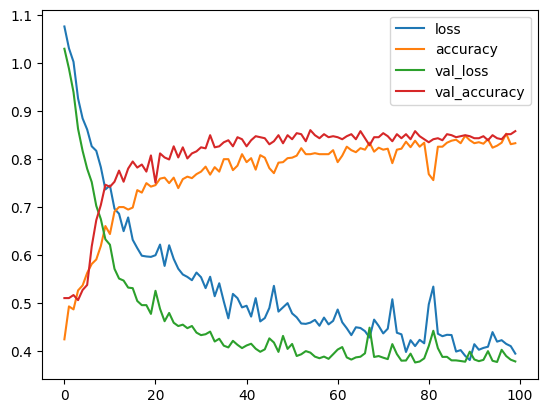

In [ ]:
import pandas as pd
pd.DataFrame(h.history).plot()

In [ ]:
model.summary()
#startowo 64,64,3
#tracimy 2 wartości w 1 i 2 indexie, bo macierz conv ma wymiar 3x3, ale 3 wartości rg w związku z parametrem 8 zamieniamy na 8
#najpierw tracimy 2 wartości w 1 i 2 indexie, bo macierz polling ma wymiar 3x3, a później dzielimy jeszcze liczę wartości przez 2, o stride = (2, 2) (62-2)/2=30
# (30-2)/2=14
# (14-2)/2=6
# (6-2)/2=2
# mnożenie warstw dla flatten 2*2*8=32

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         584       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 8)           584       
                                                                 
 flatten (Flatten)           (None, 32)               

In [ ]:
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

l = Conv2D(8, (3,3), strides=(1,1), activation="relu")
l

bx = X_train[1:4] #wzięcie 3 obrazków stąd wymiar niżej
print(bx.shape)

print(l(bx).shape) #wymiar obrazków po przepuszczeniu przez warstwę sieci przypisaną pod l

MaxPooling2D((3,3), strides=(2,2)) (l(bx)).shape #przepuszczenie obrazków przez warstwę sieci zdefiniowaną pod l oraz dodatkową warstwę poolingu

(3, 64, 64, 3)
(3, 62, 62, 8)


TensorShape([3, 30, 30, 8])

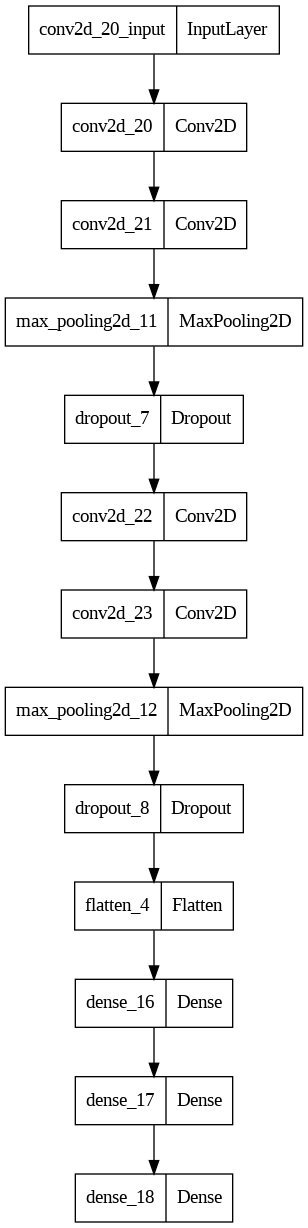

In [ ]:
keras.utils.plot_model(model)

In [ ]:
l = Conv2D(24, (3,3), strides=(2,2), activation="relu", name='warstwa')
l

bx = X_train[1:5]
bx.shape

inp = keras.Input(shape = bx.shape[1:])

o = MaxPooling2D((3,3), strides=(2,2))(l(inp))#.shape

modelf = keras.Model(inputs=inp, outputs=o)

modelf(bx)

modelf.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 warstwa (Conv2D)            (None, 31, 31, 24)        672       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 15, 15, 24)        0         
 ng2D)                                                           
                                                                 
Total params: 672 (2.62 KB)
Trainable params: 672 (2.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.evaluate(X_test, y_test), model.metrics_names

15/15 [==============================] - 20s 1s/step - loss: 1.0340 - accuracy: 0.5105


([1.0340162515640259, 0.5105485320091248], ['loss', 'accuracy'])

In [ ]:
mw = model.weights
model.weights

[<tf.Variable 'conv2d_20/kernel:0' shape=(3, 3, 3, 64) dtype=float32, numpy=
 array([[[[-0.06858847,  0.09234918,  0.06227687, ...,  0.05490169,
            0.10509115,  0.00706918],
          [ 0.01193735, -0.07819537,  0.10418554, ...,  0.05864643,
            0.00806746,  0.08090434],
          [ 0.01713102,  0.01655518,  0.08884782, ...,  0.10820939,
           -0.03753922,  0.00720143]],
 
         [[-0.02513368,  0.02998685, -0.02427502, ..., -0.01953853,
           -0.02882058, -0.04404149],
          [ 0.0658686 , -0.02042596, -0.06079004, ...,  0.01948165,
           -0.08815999,  0.06511964],
          [ 0.06298505, -0.06162778,  0.08184218, ..., -0.0052691 ,
           -0.06058997, -0.08101473]],
 
         [[-0.01289504,  0.07285287, -0.00943564, ..., -0.06579792,
           -0.07321686, -0.0614699 ],
          [ 0.05896899,  0.06734336,  0.05380047, ...,  0.00942771,
           -0.05997704,  0.06690996],
          [-0.05655523,  0.02458134, -0.05100274, ..., -0.01450934,
 

###Kartkówka

In [ ]:
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = keras.Sequential(
    [
    Conv2D(27, (2,2), strides=(2,2), padding="valid", activation="relu", input_shape=(80,80,3)),
    Conv2D(3, (2,2), strides=(2,2), padding="valid", activation="relu"),
    Conv2D(29, (2,2), strides=(2,2), padding="valid", activation="relu"),
    Flatten() #zamienia nam kształt danych w sieci z kilku wymiarów w shape na 1, aby wyliczyć nowy wymiar przemnożyć wszystkie stare wymiary
    ]
)
model.build()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 40, 40, 27)        351       
                                                                 
 conv2d_16 (Conv2D)          (None, 20, 20, 3)         327       
                                                                 
 conv2d_17 (Conv2D)          (None, 10, 10, 29)        377       
                                                                 
 flatten_5 (Flatten)         (None, 2900)              0         
                                                                 
Total params: 1055 (4.12 KB)
Trainable params: 1055 (4.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import scipy.special

sigmoid = scipy.special.expit